 This work is done out of the article https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ <- by author Jason BrownLee , I will try to tune the hypermaters of the model to improve the accuracy 
This model is still overfitting Will try a higher L2 loss of 0.1

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        36928     
_______________________________________________

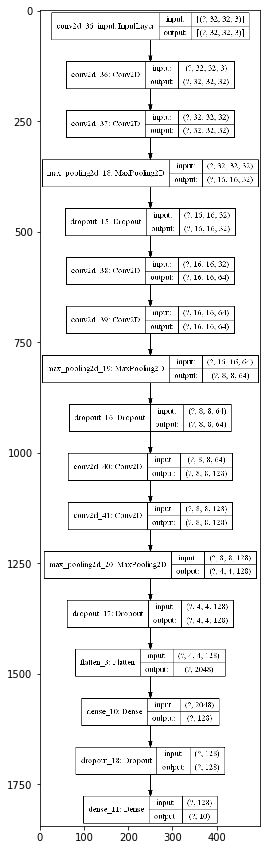

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2

batch_size = 64
num_classes = 10
epochs = 100

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_train /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#Adding a root mean sqaure optimiser to test the improvement in accuracy  
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

print(model.summary())
%matplotlib inline
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate the plot
plot_model(model, to_file = 'model_plot_cifar10_VGG3CONVLayer.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_cifar10_VGG3CONVLayer.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)

In [17]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("cifar_vgg3convlayer.h5")

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/100
782/782 [==============================] - 86s 110ms/step - loss: 3.4312 - accuracy: 0.1073 - val_loss: 340.7135 - val_accuracy: 0.1030
Epoch 2/100
782/782 [==============================] - 92s 117ms/step - loss: 3.3950 - accuracy: 0.1198 - val_loss: 645.4760 - val_accuracy: 0.1019
Epoch 3/100
782/782 [==============================] - 87s 112ms/step - loss: 3.3591 - accuracy: 0.1270 - val_loss: 1405.9233 - val_accuracy: 0.1021
Epoch 4/100
782/782 [==============================] - 86s 110ms/step - loss: 3.3270 - accuracy: 0.1206 - val_loss: 2489.5327 - val_accuracy: 0.1008
Epoch 5/100
782/782 [==============================] - 91s 117ms/step - loss: 3.2961 - accuracy: 0.1166 - val_loss: 3025.6780 - val_accuracy: 0.1002
Epoch 6/100
782/782 [==============================] - 86s 110ms/step - loss: 3.2602 - accuracy: 0.1286 - val_loss: 4886.7969 - val_accuracy: 0.1017
Epoch 7/100
782/782 [==============================] - 87s 111ms/step - loss: 3.2313 - accuracy: 0.1237 - va

{'loss': [3.4311888217926025, 3.3950271606445312, 3.359084129333496, 3.327011823654175, 3.2960922718048096, 3.260209798812866, 3.2313475608825684, 3.20707368850708, 3.178560256958008, 3.158468008041382, 3.1261918544769287, 3.1013941764831543, 3.0747928619384766, 3.057551622390747, 3.0283396244049072, 2.9847793579101562, 2.9814915657043457, 2.972416639328003, 2.890056848526001, 2.886237382888794, 2.8239381313323975, 2.836394786834717, 2.8251285552978516, 2.7562549114227295, 2.719932794570923, 2.670133352279663, 2.6382083892822266, 2.5983312129974365, 2.5558106899261475, 2.5190486907958984, 2.471787452697754, 2.4113998413085938, 2.3704540729522705, 2.3224709033966064, 2.2826993465423584, 2.234750270843506, 2.2127578258514404, 2.1836423873901367, 2.1591849327087402, 2.11795711517334, 2.0967226028442383, 2.0667243003845215, 2.0494213104248047, 2.0248000621795654, 2.0009448528289795, 1.9793972969055176, 1.9570188522338867, 1.9416340589523315, 1.9137356281280518, 1.8981118202209473, 1.882772

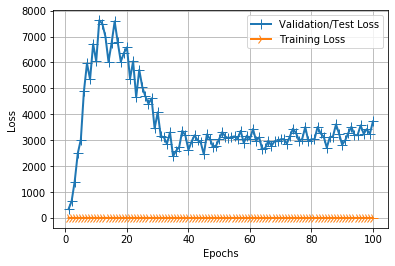

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

print(history_dict)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

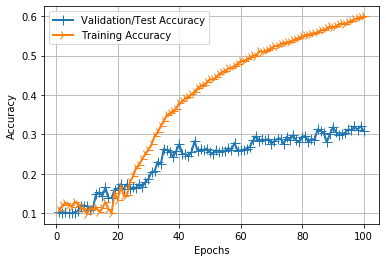

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_row, img_height, img_depth = 32,32,3
classifier = load_model('cifar_vgg3convlayer.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()